In [2]:
import os
from ultralytics import YOLO
import cv2
from typing import Any
from collections import deque
import math
from IPython.display import display, Image

In [3]:
INPUT_FOLDER = f"../input_video/"
OUTPUT_FOLDER = f"../output_video/"
MODEL_PATH = f'../input_data/best.pt'

model = YOLO(MODEL_PATH)
files = os.listdir(INPUT_FOLDER)
files.remove('.gitkeep')
print(files)
QUEUE_LENGTH = 10

['workers_1(1).mp4']


In [4]:
print(model.names)

{0: 'person', 1: 'Hardhat'}


In [5]:
def draw_box(results, frame, person_count_queue, hardhat_count_queue):
    """
    Функция обозначения на изображении класса и скора
    :param results: результат обнаружения с координатами рамок, классом, уверенностью
    :param frame: кадр изображения
    :param person_count_queue: очередь для хранения количества людей
    :param hardhat_count_queue: очередь для хранения количества касок
    :return: измененный кадр
    """
    person_count = 0
    hardhat_count = 0
    
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        class_name = model.names[int(class_id)]
        if (class_name == 'person' and score > 0.5) or (class_name == 'Hardhat' and score > 0.2):
            if class_name == 'person':
                color = (0, 255, 0)
                person_count += 1
            elif class_name == 'Hardhat':
                color = (3, 44, 252)
                hardhat_count += 1
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
            label = f"{class_name} {score:.2f}"
            cv2.putText(frame, label, (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Обновляем очереди
    person_count_queue.append(person_count)
    hardhat_count_queue.append(hardhat_count)
    
    if len(person_count_queue) > QUEUE_LENGTH:
        person_count_queue.popleft()
    if len(hardhat_count_queue) > QUEUE_LENGTH:
        hardhat_count_queue.popleft()
    
    # Вычисляем среднее значение
    avg_person_count = math.ceil(sum(person_count_queue) / len(person_count_queue))
    avg_hardhat_count = math.ceil(sum(hardhat_count_queue) / len(hardhat_count_queue))
    
    # Отображение среднего количества людей и касок
    cv2.putText(frame, f"People: {avg_person_count}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.putText(frame, f"Hardhats: {avg_hardhat_count}", (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (3, 44, 252), 2)
    
    return frame

In [6]:

def main() -> None:
    """
    Основная функция обработки видео
    """
    if not files:
        raise FileNotFoundError("Поместите хотя бы одно видео в input_video")
    for file_name in files:
        file_path = INPUT_FOLDER + file_name
        output_name = OUTPUT_FOLDER + file_name[:-4] + ".mp4"

        cap = cv2.VideoCapture(file_path)
        size = (int(cap.get(3)), int(cap.get(4)))
        fps = cap.get(5)

        out = cv2.VideoWriter(output_name, cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), fps, size)

        person_count_queue = deque(maxlen=QUEUE_LENGTH)
        hardhat_count_queue = deque(maxlen=QUEUE_LENGTH)
        
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            results = model(frame)[0]
            frame = draw_box(results, frame, person_count_queue, hardhat_count_queue)

            out.write(frame)
            frame_min = frame.copy()
            cv2.imshow(file_name[:-4] + ' detection', frame_min)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        out.release()
        cv2.destroyAllWindows()


if __name__ == '__main__':
    main()


0: 384x640 5 persons, 3 Hardhats, 42.0ms
Speed: 3.0ms preprocess, 42.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 3 Hardhats, 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 3 Hardhats, 9.0ms
Speed: 4.0ms preprocess, 9.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 4 Hardhats, 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 4 Hardhats, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 3 Hardhats, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 3 Hardhats, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 3 Hardhats

### Вот и подошла работа к концу. Я понимаю, что код не является идеальным (далеко не идеальным), но я старался сделать его как можно лучше. Проект многому меня научил в части дообучения модели. Спасибо за внимание!

Это я, когда HR дает на доработку 1 сутки, а у тебя ещё основная работа
Image(filename=f'{parent_directory}/tun_and_rec/datasets/confusion_matrix_normalized.png', width=800)

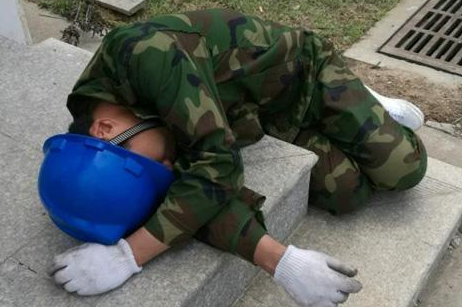

In [7]:
Image(filename=f'D:/Detecting_and_rendering_people_2.0/tun_and_rec/datasets/111.png', width=800)